In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_prac = pd.read_excel('Project Data.xlsx', sheet_name = '#RailaTheLiar')

df_prac.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  
0  RT @ken_rende: Change is inevitable. Kiambaa i...  
1  Dj Evolve is trending with #RailaTheLIAR and #...  
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...  
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...  
4  RT @claraclaritah2: Usiache baridi ikufanyie i...

In [ ]:
df_prac.shape

(1173, 3)

In [ ]:
df_copy_prac = df_prac.copy()

### Check for duplicates

In [ ]:
df_prac.duplicated().sum()

0

In [ ]:
df_prac.duplicated(subset = 'text').sum()

637

In [ ]:
df_prac.drop_duplicates(subset = 'text', inplace = True)

df_prac.shape

(536, 3)

### 1. Remove Twitter handles

In [ ]:
import re

In [ ]:
def remove_pattern_in_text(tweet, pattern_to_search_for):
    all_text_with_sign = re.findall(pattern_to_search_for, tweet)
    for i in all_text_with_sign:
        tweet = re.sub(i, '', tweet)
        
    return tweet    

In [ ]:
# remove twitter handles (@user)

df_prac['user_handle_removed'] = np.vectorize(remove_pattern_in_text)(df_prac['text'], "@[\w]*")

df_prac.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...   
4  RT @claraclaritah2: Usiache baridi ikufanyie i...   

                                 user_handle_removed  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with #RailaTheLIAR and #...  
2      My friend you really think jigger infestat...  
3  RT : #GetPOLISHED  POLISHED cosmetics Kilimani...  
4  RT : Usiache baridi ikufanyie ivo\n#Masculinit...

### 2. Remove Hashtags

In [ ]:
def remove_hashtags(tweet):
    """Takes a string and removes any hash tags"""
    tweet = re.sub('(#[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)  # remove hash tags
    return tweet  

df_prac['removed_hashtags'] = df_prac['user_handle_removed'].apply(remove_hashtags)

df_prac.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...   
4  RT @claraclaritah2: Usiache baridi ikufanyie i...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   
3  RT : #GetPOLISHED  POLISHED cosmetics Kilimani...   
4  RT : Usiache baridi ikufanyie ivo\n#Masculinit...   

                                    removed_hashtags  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...  
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...  
4           RT : Usiache baridi ikufanyie ivo\n \n\n

### 3. Removing links

In [ ]:
def remove_links(tweet):
    """Takes a string and removes web links from it"""
    tweet = re.sub(r'http\S+', '', tweet)   # remove http links
    tweet = re.sub(r'bit.ly/\S+', '', tweet)  # remove bitly links
    tweet = tweet.strip('[link]')   # remove [links]
    tweet = re.sub(r'pic.twitter\S+','', tweet)
    return tweet

df_prac['removed_links'] = df_prac['removed_hashtags'].apply(remove_links)

df_prac.head(3)

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...

### 3. Tokenization
- i) https://www.datacamp.com/community/tutorials/text-analytics-beginners-nltk
- ii) https://medium.com/predict/hands-on-lab-on-text-preprocessing-in-nlp-using-python-ea419a00396e

- The first step to text analytics is breaking things down into smaller units e.g. sentences or words

In [ ]:
from nltk import sent_tokenize, word_tokenize

In [ ]:
def tokenize_into_sentence(tweet):
    df = sent_tokenize(tweet)
    return df

df_prac['tweet_sentence_tokenized'] = df_prac['removed_hashtags'].apply(lambda x: tokenize_into_sentence(x.lower()))

df_prac.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...   
4  RT @claraclaritah2: Usiache baridi ikufanyie i...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   
3  RT : #GetPOLISHED  POLISHED cosmetics Kilimani...   
4  RT : Usiache baridi ikufanyie ivo\n#Masculinit...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...   
4           RT : Usiache baridi ikufanyie ivo\n \n\n   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   
3  [rt :   polished cosmetics kilimani nairobi\n ...   
4                [rt : usiache baridi ikufanyie ivo]   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   
3  [rt, :, polished, cosmetics, kilimani, nairobi...   
4           [rt, :, usiache, baridi, ikufanyie, ivo]   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polished, cosmetics, kilimani, nairobi, p...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   
3  [rt, polish, cosmet, kilimani, nairobi, polish...   
4                [rt, usiach, baridi, ikufanyi, ivo]   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polish, cosmetic, kilimani, nairobi, poli...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...  
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...  
4           RT : Usiache baridi ikufanyie ivo\n \n\n

In [ ]:
def tokenize_into_word(tweet):
    df = word_tokenize(tweet)
    return df

df_prac['tweet_word_tokenized'] = df_prac['removed_hashtags'].str.lower().apply(tokenize_into_word)

df_prac.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...   
4  RT @claraclaritah2: Usiache baridi ikufanyie i...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   
3  RT : #GetPOLISHED  POLISHED cosmetics Kilimani...   
4  RT : Usiache baridi ikufanyie ivo\n#Masculinit...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...   
4           RT : Usiache baridi ikufanyie ivo\n \n\n   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   
3  [rt :   polished cosmetics kilimani nairobi\n ...   
4                [rt : usiache baridi ikufanyie ivo]   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   
3  [rt, :, polished, cosmetics, kilimani, nairobi...   
4           [rt, :, usiache, baridi, ikufanyie, ivo]   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polished, cosmetics, kilimani, nairobi, p...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   
3  [rt, polish, cosmet, kilimani, nairobi, polish...   
4                [rt, usiach, baridi, ikufanyi, ivo]   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polish, cosmetic, kilimani, nairobi, poli...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...  
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...  
4           RT : Usiache baridi ikufanyie ivo\n \n\n

### 4. Take care of punctuations and stopwords

In [ ]:
from nltk.corpus import stopwords
from string import punctuation

stopwords_en = set(stopwords.words('english'))

# It's a string so we have to them into a set type
print('From string.punctuation:', type(punctuation), punctuation)

punct_stopwords = stopwords_en.union(set(punctuation))

print(punct_stopwords)

From string.punctuation: <class 'str'> !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
{'should', 'was', '@', 'weren', 'my', '*', 'me', 'there', 'doesn', "wasn't", 'below', 'other', "don't", 'shouldn', 'itself', 'don', 'your', 'but', 'not', 'ain', "you're", 'further', 're', 'having', 'most', 'above', 'down', 'isn', 'its', 'have', 'it', 'theirs', 'now', "mustn't", 'i', 'will', 'through', 'has', 'mustn', 'over', 'those', '-', 'be', 'by', 'and', 'ma', 'out', 'herself', 'from', 'of', 'into', "you'll", 't', 'won', "hasn't", '%', 'mightn', "shan't", 'she', "hadn't", '(', '<', 'such', 'this', 'in', ')', 'yours', 'yourselves', '{', 'doing', 'why', 'to', 'their', '!', 'both', "doesn't", '$', 'again', 've', '[', 'at', 'own', 'themselves', 'a', 'which', 'an', 'the', 'very', 'himself', 'we', 'what', '}', 'each', 'wouldn', 'll', 'all', 'are', 'did', 'under', '~', '#', 'am', 'him', "couldn't", 'ours', 'when', 'with', 'who', "you've", '+', 'couldn', "haven't", 'our', 'is', "she's", 'about', 'some', "'", 'any', '?',

In [ ]:
def remove_punctuation_and_stopwords(tokenized_words):
    df = [word for word in tokenized_words if word not in punct_stopwords]
    return df

df_prac['removed_punctuations_and_stopwords'] = df_prac['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

df_prac.head(3)

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...

### 5. Lexicon Normalization

In [ ]:
import nltk

from nltk.stem import PorterStemmer

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag

nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

df_prac['tweet_stemmed'] = df_prac['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

df_prac.head(3)

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...

In [ ]:
wnl = WordNetLemmatizer()

def penn2morphy(penntag):
    """ Converts Penn Treebank tags to WordNet. """
    morphy_tag = {'NN':'n', 'JJ':'a',
                  'VB':'v', 'RB':'r'}
    try:
        return morphy_tag[penntag[:2]]
    except:
        return 'n' 
    
def lemmatize_sent(text): 
    # Text input is string, returns lowercased strings.
    return [wnl.lemmatize(word.lower(), pos = penn2morphy(tag)) 
            for word, tag in pos_tag(text)]

lemmatize_sent(tokenize_into_word('Prisha is learning maths online'))

['prisha', 'be', 'learn', 'math', 'online']

In [ ]:
df_prac['lemmatized_tweet'] = df_prac['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

df_prac.head(3)

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   

                                                text  \
0  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   

                                 user_handle_removed  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   

                            tweet_sentence_tokenized  \
0  [rt : change is inevitable., kiambaa is prepar...   
1  [dj evolve is trending with  and ., tomorrow  ...   
2  [    my friend you really think jigger infesta...   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   

                                    lemmatized_tweet  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...

### 6. Get sentiments i.e. positive, neutral, negative

- The sentiment function of textblob returns two properties, polarity, and subjectivity.
- Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [ ]:
from textblob import TextBlob

In [ ]:
sentiment_objects = [TextBlob(tweet) for tweet in df_prac['text']]

sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in sentiment_objects]

sentiment_df = pd.DataFrame(sentiment_values, columns = ["polarity", "tweet"])

sentiment_df.head()

polarity                                              tweet
0   0.10000  RT @ken_rende: Change is inevitable. Kiambaa i...
1   0.00000  Dj Evolve is trending with #RailaTheLIAR and #...
2  -0.12381  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...
3   0.00000  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...
4   0.00000  RT @claraclaritah2: Usiache baridi ikufanyie i...

In [ ]:
sentiment_df.describe()

polarity
count  536.000000
mean     0.070168
std      0.199638
min     -0.781250
25%      0.000000
50%      0.000000
75%      0.100000
max      1.000000

### 7.  Visualizing Sentiments and Word Cloud as EDA

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

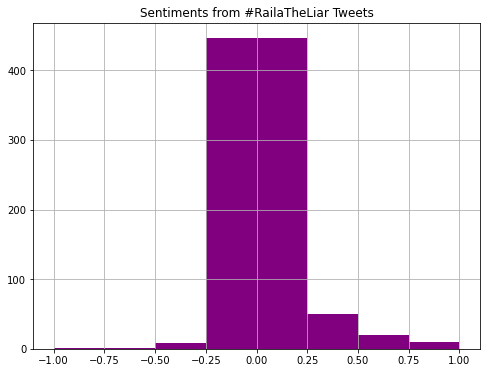

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from #RailaTheLiar Tweets")

plt.show()

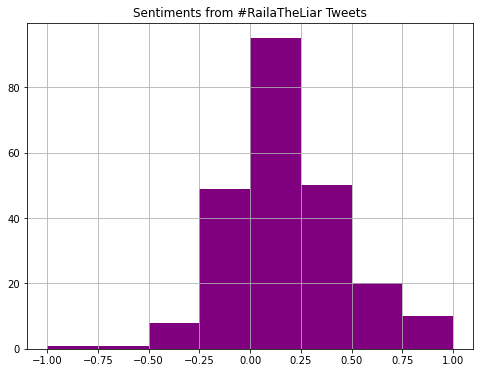

In [ ]:
#To get a better visual of the polarit values, it can be helpful to remove the polarity values equal to zero 
#and create a break in the histogram at zero.

sentiment_df_no_zero_values = sentiment_df[sentiment_df['polarity'] != 0] 

fig, ax = plt.subplots(figsize=(8, 6))

# Plot histogram with break at zero

sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from #RailaTheLiar Tweets")

plt.show()

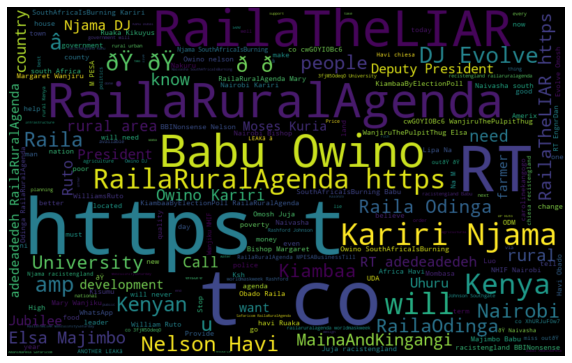

In [ ]:
all_words = ' '.join([str(text) for text in df_prac['text']])


wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))

plt.imshow(wordcloud, interpolation = "bilinear")

plt.axis('off')

plt.show()

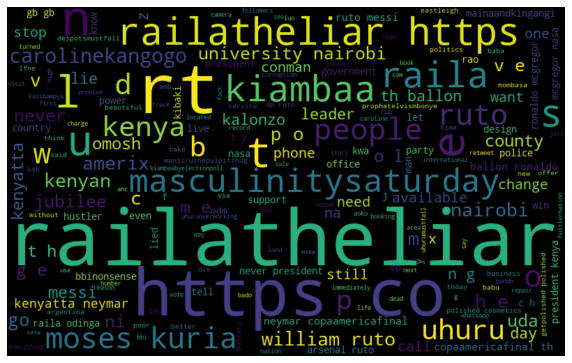

In [ ]:
all_words = ' '.join([text for text in df_prac['stopwords_removed']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

---

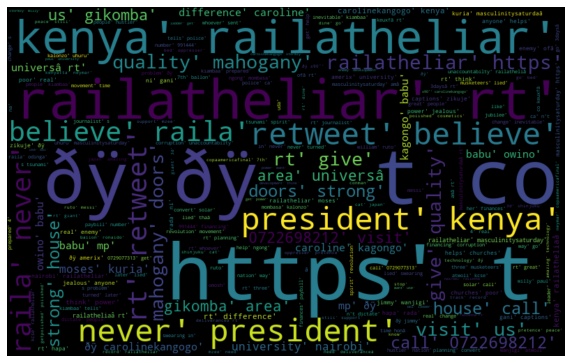

In [ ]:
all_words = ' '.join([str(text) for text in df['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

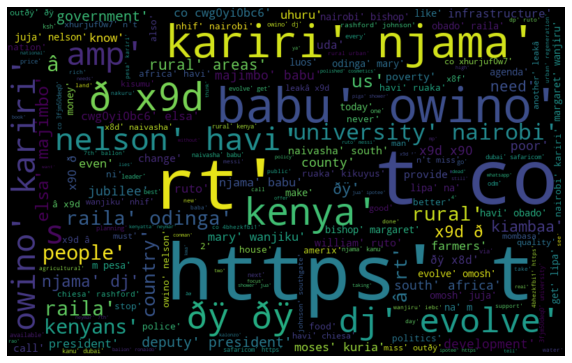

In [ ]:
all_words = ' '.join([str(text) for text in df_prac['removed_punctuations_and_stopwords']])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

---

## Actual Data Analysis begins here

### 1. Raila

In [ ]:
raila = pd.read_excel('Project Data (1).xlsx', sheet_name = '#RailaTheLiar #Rural Agenda')

raila.head()

Unnamed: 0                   id  \
0           1  1415252231797050112   
1           1  1415224445833070080   
2           1  1415213080921999872   
3           1  1415207986130210048   
4           1  1415207675420359936   

                                                text  
0  RT @ken_rende: Change is inevitable. Kiambaa i...  
1  Dj Evolve is trending with #RailaTheLIAR and #...  
2  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...  
3  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...  
4  RT @claraclaritah2: Usiache baridi ikufanyie i...

In [ ]:
raila.shape

(1173, 3)

In [ ]:
raila_copy = raila.copy()

raila.drop('Unnamed: 0', axis = 'columns', inplace = True)

raila_no_duplicates = raila.drop_duplicates(subset = 'text')

raila_no_duplicates.shape

(536, 2)

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raila_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(raila_no_duplicates['text'], "@[\w]*")

raila_no_duplicates['removed_hashtags'] = raila_no_duplicates['removed_@user'].apply(remove_hashtags)

raila_no_duplicates['removed_links'] = raila_no_duplicates['removed_hashtags'].apply(remove_links)

raila_no_duplicates['tweet_sentence_tokenized'] = raila_no_duplicates['removed_links'].apply(tokenize_into_sentence)

raila_no_duplicates['tweet_word_tokenized'] = raila_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

raila_no_duplicates['removed_punctuations_and_stopwords'] = raila_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

raila_no_duplicates['tweet_stemmed'] = raila_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

raila_no_duplicates['tweet_lemmatized'] = raila_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

raila_no_duplicates.head()

id                                               text  \
0  1415252231797050112  RT @ken_rende: Change is inevitable. Kiambaa i...   
1  1415224445833070080  Dj Evolve is trending with #RailaTheLIAR and #...   
2  1415213080921999872  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...   
3  1415207986130210048  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...   
4  1415207675420359936  RT @claraclaritah2: Usiache baridi ikufanyie i...   

                                       removed_@user  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with #RailaTheLIAR and #...   
2      My friend you really think jigger infestat...   
3  RT : #GetPOLISHED  POLISHED cosmetics Kilimani...   
4  RT : Usiache baridi ikufanyie ivo\n#Masculinit...   

                                    removed_hashtags  \
0  RT : Change is inevitable. Kiambaa is prepared...   
1  Dj Evolve is trending with  and . Tomorrow  Wa...   
2      My friend you really think jigger infestat...   
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...   
4           RT : Usiache baridi ikufanyie ivo\n \n\n   

                            tweet_sentence_tokenized  \
0  [RT : Change is inevitable., Kiambaa is prepar...   
1  [Dj Evolve is trending with  and ., Tomorrow  ...   
2  [    My friend you really think jigger infesta...   
3  [RT :   POLISHED cosmetics Kilimani Nairobi\n ...   
4                [RT : Usiache baridi ikufanyie ivo]   

                                tweet_word_tokenized  \
0  [rt, :, change, is, inevitable, ., kiambaa, is...   
1  [dj, evolve, is, trending, with, and, ., tomor...   
2  [my, friend, you, really, think, jigger, infes...   
3  [rt, :, polished, cosmetics, kilimani, nairobi...   
4           [rt, :, usiache, baridi, ikufanyie, ivo]   

                  removed_punctuations_and_stopwords  \
0  [rt, change, inevitable, kiambaa, prepared, 4,...   
1  [dj, evolve, trending, tomorrow, wanjiku, na, ...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polished, cosmetics, kilimani, nairobi, p...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       tweet_stemmed  \
0  [rt, chang, inevit, kiambaa, prepar, 4, real, ...   
1  [dj, evolv, trend, tomorrow, wanjiku, na, wanj...   
2  [friend, realli, think, jigger, infest, povert...   
3  [rt, polish, cosmet, kilimani, nairobi, polish...   
4                [rt, usiach, baridi, ikufanyi, ivo]   

                                    tweet_lemmatized  \
0  [rt, change, inevitable, kiambaa, prepare, 4, ...   
1  [dj, evolve, trend, tomorrow, wanjiku, na, wan...   
2  [friend, really, think, jigger, infestation, p...   
3  [rt, polish, cosmetic, kilimani, nairobi, poli...   
4              [rt, usiache, baridi, ikufanyie, ivo]   

                                       removed_links  
0  RT : Change is inevitable. Kiambaa is prepared...  
1  Dj Evolve is trending with  and . Tomorrow  Wa...  
2      My friend you really think jigger infestat...  
3  RT :   POLISHED cosmetics Kilimani Nairobi\n  ...  
4           RT : Usiache baridi ikufanyie ivo\n \n\n

In [ ]:
raila['removed_@user'] = np.vectorize(remove_pattern_in_text)(raila['text'], "@[\w]*")

raila['removed_hashtags'] = raila['removed_@user'].apply(remove_hashtags)

raila['removed_links'] = raila['removed_hashtags'].apply(remove_links)

raila['tweet_sentence_tokenized'] = raila['removed_links'].apply(tokenize_into_sentence)

raila['tweet_word_tokenized'] = raila['removed_links'].str.lower().apply(tokenize_into_word)

raila['removed_punctuations_and_stopwords'] = raila['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

raila['tweet_stemmed'] = raila['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

raila['tweet_lemmatized'] = raila['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
raila_sentiment_objects = [TextBlob(tweet) for tweet in raila_no_duplicates['text']]

raila_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in raila_sentiment_objects]

raila_sentiment_df = pd.DataFrame(raila_sentiment_values, columns = ["polarity", "tweet"])

raila_sentiment_df.head()

polarity                                              tweet
0   0.10000  RT @ken_rende: Change is inevitable. Kiambaa i...
1   0.00000  Dj Evolve is trending with #RailaTheLIAR and #...
2  -0.12381  @derrick_ngoshi @TeresahAtieno @OleItumbi @Rai...
3   0.00000  RT @DgohnieDigital: #GetPOLISHED  POLISHED cos...
4   0.00000  RT @claraclaritah2: Usiache baridi ikufanyie i...

In [ ]:
raila_sentiment_df.describe()

polarity
count  536.000000
mean     0.070168
std      0.199638
min     -0.781250
25%      0.000000
50%      0.000000
75%      0.100000
max      1.000000

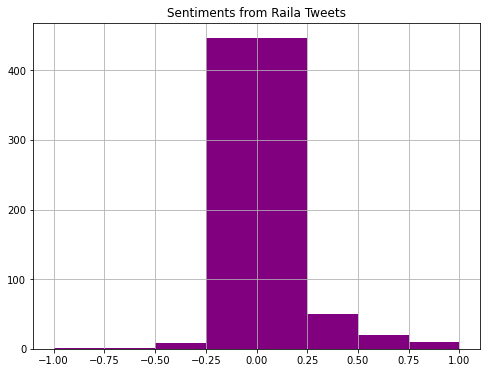

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
raila_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Raila Tweets")

plt.show()

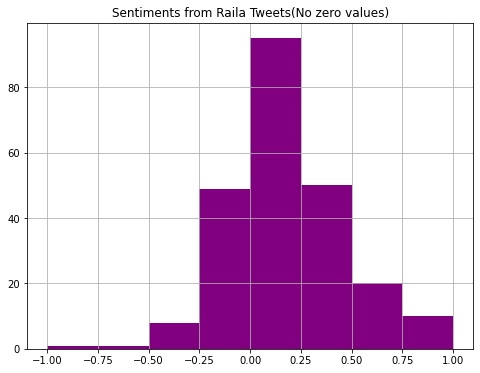

In [ ]:
raila_sentiment_df_no_zero_values = raila_sentiment_df[raila_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram with break at zero
raila_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Raila Tweets(No zero values)")

plt.show()

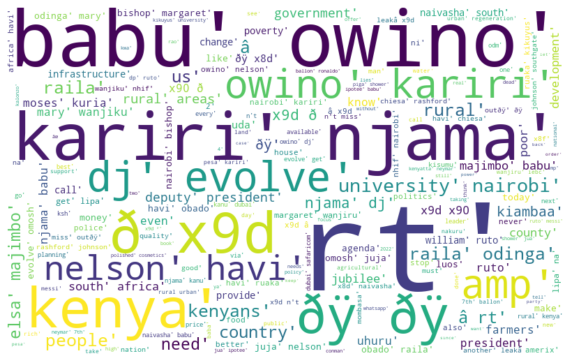

In [ ]:
stopword = nltk.corpus.stopwords.words('english')

all_words = ' '.join([str(text) for text in raila_no_duplicates['removed_punctuations_and_stopwords']])

stopwords = set(stopword)

wordcloud = WordCloud(width = 800, height = 500, stopwords = stopwords, random_state = 21, background_color = 'white').generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

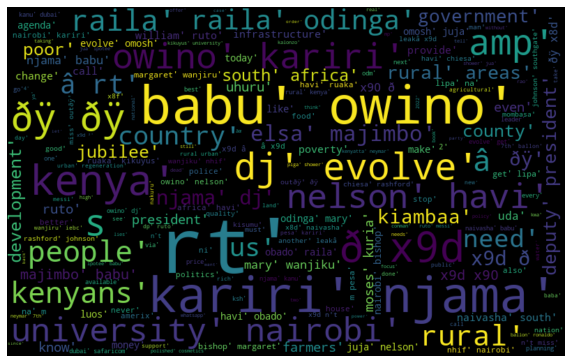

In [ ]:
all_words = ' '.join([str(text) for text in raila_no_duplicates['removed_punctuations_and_stopwords']])


wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 2. Kalonzo

In [ ]:
kalonzo = pd.read_excel('Project Data (1).xlsx', sheet_name = 'Kalonzo')

kalonzo.head()

Unnamed: 0                   id  \
0           0  1419680320673270016   
1           1  1419680298296649984   
2           2  1419680073867790080   
3           3  1419680018351980032   
4           4  1419679728038970112   

                                                text  
0  @Gideon_Kitheka @kipmurkomen Then help Kalonzo...  
1  RT @WaruiJohn2: Wiper Party led by Kalonzo Mus...  
2  RT @Madoka_Ke: Dear Kalonzo,\nKalonzo Musyoka,...  
3  Dear Kalonzo,\nKalonzo Musyoka, you can't beco...  
4  RT @wanyinaa: Kalonzo Musyoka doesn't want to ...

In [ ]:
kalonzo.shape

(946, 3)

In [ ]:
kalonzo.drop('Unnamed: 0', axis = 'columns', inplace = True)

kalonzo_no_duplicates = kalonzo.drop_duplicates(subset = 'text')

kalonzo_no_duplicates.shape

(515, 2)

In [ ]:
kalonzo_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(kalonzo_no_duplicates['text'], "@[\w]*")

kalonzo_no_duplicates['removed_hashtags'] = kalonzo_no_duplicates['removed_@user'].apply(remove_hashtags)

kalonzo_no_duplicates['removed_links'] = kalonzo_no_duplicates['removed_hashtags'].apply(remove_links)

kalonzo_no_duplicates['tweet_sentence_tokenized'] = kalonzo_no_duplicates['removed_links'].apply(tokenize_into_sentence)

kalonzo_no_duplicates['tweet_word_tokenized'] = kalonzo_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

kalonzo_no_duplicates['removed_punctuations_and_stopwords'] = kalonzo_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

kalonzo_no_duplicates['tweet_stemmed'] = kalonzo_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

kalonzo_no_duplicates['tweet_lemmatized'] = kalonzo_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

kalonzo_no_duplicates.head()

id                                               text  \
0  1419680320673270016  @Gideon_Kitheka @kipmurkomen Then help Kalonzo...   
1  1419680298296649984  RT @WaruiJohn2: Wiper Party led by Kalonzo Mus...   
2  1419680073867790080  RT @Madoka_Ke: Dear Kalonzo,\nKalonzo Musyoka,...   
3  1419680018351980032  Dear Kalonzo,\nKalonzo Musyoka, you can't beco...   
4  1419679728038970112  RT @wanyinaa: Kalonzo Musyoka doesn't want to ...   

                                       removed_@user  \
0                Then help Kalonzo if you're better!   
1  RT : Wiper Party led by Kalonzo Musyoka quits ...   
2  RT : Dear Kalonzo,\nKalonzo Musyoka, you can't...   
3  Dear Kalonzo,\nKalonzo Musyoka, you can't beco...   
4  RT : Kalonzo Musyoka doesn't want to leave NAS...   

                                    removed_hashtags  \
0                Then help Kalonzo if you're better!   
1  RT : Wiper Party led by Kalonzo Musyoka quits ...   
2  RT : Dear Kalonzo,\nKalonzo Musyoka, you can't...   
3  Dear Kalonzo,\nKalonzo Musyoka, you can't beco...   
4  RT : Kalonzo Musyoka doesn't want to leave NAS...   

                                       removed_links  \
0                Then help Kalonzo if you're better!   
1  RT : Wiper Party led by Kalonzo Musyoka quits ...   
2  RT : Dear Kalonzo,\nKalonzo Musyoka, you can't...   
3  Dear Kalonzo,\nKalonzo Musyoka, you can't beco...   
4  RT : Kalonzo Musyoka doesn't want to leave NAS...   

                            tweet_sentence_tokenized  \
0            [  Then help Kalonzo if you're better!]   
1  [RT : Wiper Party led by Kalonzo Musyoka quits...   
2  [RT : Dear Kalonzo,\nKalonzo Musyoka, you can'...   
3  [Dear Kalonzo,\nKalonzo Musyoka, you can't bec...   
4  [RT : Kalonzo Musyoka doesn't want to leave NA...   

                                tweet_word_tokenized  \
0     [then, help, kalonzo, if, you, 're, better, !]   
1  [rt, :, wiper, party, led, by, kalonzo, musyok...   
2  [rt, :, dear, kalonzo, ,, kalonzo, musyoka, ,,...   
3  [dear, kalonzo, ,, kalonzo, musyoka, ,, you, c...   
4  [rt, :, kalonzo, musyoka, does, n't, want, to,...   

                  removed_punctuations_and_stopwords  \
0                       [help, kalonzo, 're, better]   
1  [rt, wiper, party, led, kalonzo, musyoka, quit...   
2  [rt, dear, kalonzo, kalonzo, musyoka, ca, n't,...   
3  [dear, kalonzo, kalonzo, musyoka, ca, n't, bec...   
4  [rt, kalonzo, musyoka, n't, want, leave, nasa,...   

                                       tweet_stemmed  \
0                       [help, kalonzo, 're, better]   
1  [rt, wiper, parti, led, kalonzo, musyoka, quit...   
2  [rt, dear, kalonzo, kalonzo, musyoka, ca, n't,...   
3  [dear, kalonzo, kalonzo, musyoka, ca, n't, bec...   
4  [rt, kalonzo, musyoka, n't, want, leav, nasa, ...   

                                    tweet_lemmatized  
0                         [help, kalonzo, 're, good]  
1  [rt, wiper, party, lead, kalonzo, musyoka, qui...  
2  [rt, dear, kalonzo, kalonzo, musyoka, ca, n't,...  
3  [dear, kalonzo, kalonzo, musyoka, ca, n't, bec...  
4  [rt, kalonzo, musyoka, n't, want, leave, nasa,...

In [ ]:
kalonzo['removed_@user'] = np.vectorize(remove_pattern_in_text)(kalonzo['text'], "@[\w]*")

kalonzo['removed_hashtags'] = kalonzo['removed_@user'].apply(remove_hashtags)

kalonzo['removed_links'] = kalonzo['removed_hashtags'].apply(remove_links)

kalonzo['tweet_sentence_tokenized'] = kalonzo['removed_links'].apply(tokenize_into_sentence)

kalonzo['tweet_word_tokenized'] = kalonzo['removed_links'].str.lower().apply(tokenize_into_word)

kalonzo['removed_punctuations_and_stopwords'] = kalonzo['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

kalonzo['tweet_stemmed'] = kalonzo['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

kalonzo['tweet_lemmatized'] = kalonzo['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
kalonzo_sentiment_objects = [TextBlob(tweet) for tweet in kalonzo_no_duplicates['text']]

kalonzo_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in kalonzo_sentiment_objects]

kalonzo_sentiment_df = pd.DataFrame(kalonzo_sentiment_values, columns = ["polarity", "tweet"])

kalonzo_sentiment_df.describe()

polarity
count  515.000000
mean     0.033792
std      0.239087
min     -1.000000
25%      0.000000
50%      0.000000
75%      0.033333
max      1.000000

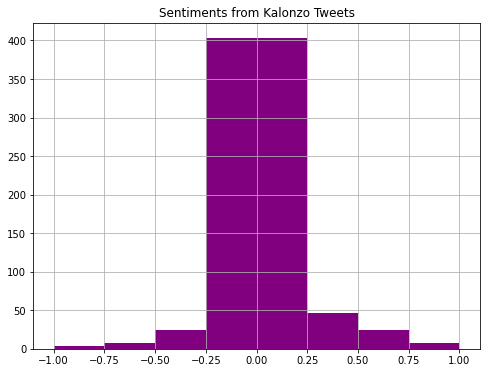

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
kalonzo_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Kalonzo Tweets")

plt.show()

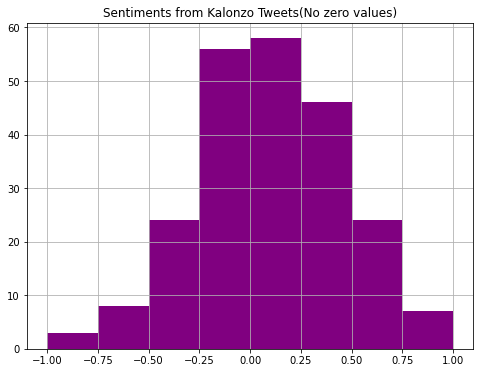

In [ ]:
kalonzo_sentiment_df_no_zero_values = kalonzo_sentiment_df[kalonzo_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram with break at zero
kalonzo_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Kalonzo Tweets(No zero values)")

plt.show()

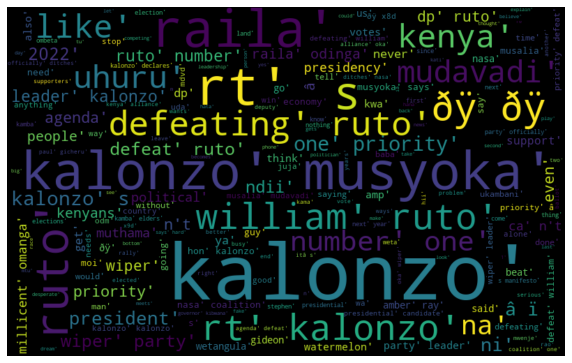

In [ ]:
all_words = ' '.join([str(text) for text in kalonzo_no_duplicates['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

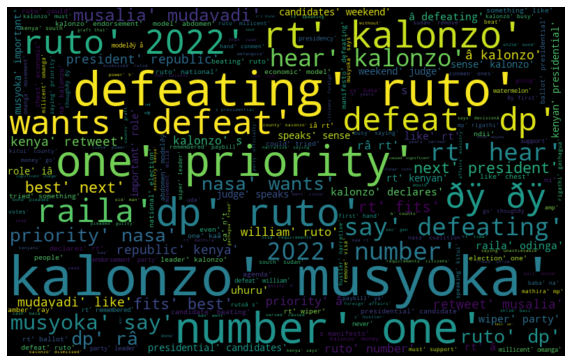

In [ ]:
all_words = ' '.join([str(text) for text in kalonzo['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

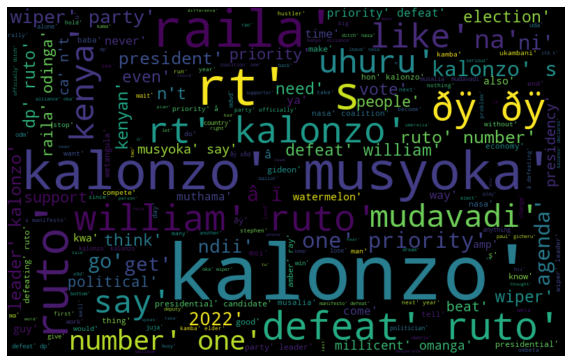

In [ ]:
all_words = ' '.join([str(text) for text in kalonzo_no_duplicates['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
all_words = ' '.join([str(text) for text in kalonzo['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

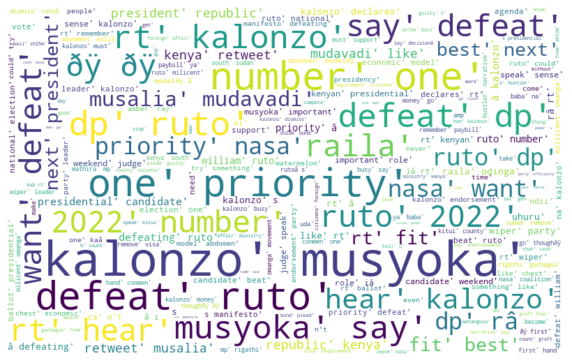

In [ ]:
all_words = ' '.join([str(text) for text in kalonzo['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, background_color = 'white').generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 2. Ruto

In [ ]:
ruto = pd.read_excel('Project Data (1).xlsx', sheet_name = 'Ruto')

ruto.head()

Unnamed: 0                   id  \
0           0  1419702810824819968   
1           1  1419702793649200128   
2           2  1419702740377370112   
3           3  1419702720827630080   
4           4  1419702702548920064   

                                                text  
0  RT @FrankMtetezi: @kipmurkomen But again Mr Pr...  
1  @mosesmabonga93 @Philosopher254 @citizentvkeny...  
2  RT @mogire_jusper: KENYAN IRONY \n\nODM worshi...  
3  RT @kipmurkomen: Priority No.1 for DP William ...  
4  @AtwoliDza @COTU_K And you forgot to mention B...

In [ ]:
ruto.shape

(1614, 3)

In [ ]:
ruto.drop('Unnamed: 0', axis = 'columns', inplace = True)

ruto_no_duplicates = ruto.drop_duplicates(subset = 'text')

ruto_no_duplicates.shape

(1009, 2)

In [ ]:
ruto_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(ruto_no_duplicates['text'], "@[\w]*")

ruto_no_duplicates['removed_hashtags'] = ruto_no_duplicates['removed_@user'].apply(remove_hashtags)

ruto_no_duplicates['removed_links'] = ruto_no_duplicates['removed_hashtags'].apply(remove_links)

ruto_no_duplicates['tweet_sentence_tokenized'] = ruto_no_duplicates['removed_links'].apply(tokenize_into_sentence)

ruto_no_duplicates['tweet_word_tokenized'] = ruto_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

ruto_no_duplicates['removed_punctuations_and_stopwords'] = ruto_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

ruto_no_duplicates['tweet_stemmed'] = ruto_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

ruto_no_duplicates['tweet_lemmatized'] = ruto_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

ruto_no_duplicates.head()

id                                               text  \
0  1419702810824819968  RT @FrankMtetezi: @kipmurkomen But again Mr Pr...   
1  1419702793649200128  @mosesmabonga93 @Philosopher254 @citizentvkeny...   
2  1419702740377370112  RT @mogire_jusper: KENYAN IRONY \n\nODM worshi...   
3  1419702720827630080  RT @kipmurkomen: Priority No.1 for DP William ...   
4  1419702702548920064  @AtwoliDza @COTU_K And you forgot to mention B...   

                                       removed_@user  \
0  RT :  But again Mr Premature wisdom ejaculator...   
1     Dont worry, ruto was in and he knos those w...   
2  RT : KENYAN IRONY \n\nODM worshippers listened...   
3  RT : Priority No.1 for DP William Ruto is bott...   
4    And you forgot to mention BBI  and RUTO? I t...   

                                    removed_hashtags  \
0  RT :  But again Mr Premature wisdom ejaculator...   
1     Dont worry, ruto was in and he knos those w...   
2  RT : KENYAN IRONY \n\nODM worshippers listened...   
3  RT : Priority No.1 for DP William Ruto is bott...   
4    And you forgot to mention BBI  and RUTO? I t...   

                                       removed_links  \
0  RT :  But again Mr Premature wisdom ejaculator...   
1     Dont worry, ruto was in and he knos those w...   
2  RT : KENYAN IRONY \n\nODM worshippers listened...   
3  RT : Priority No.1 for DP William Ruto is bott...   
4    And you forgot to mention BBI  and RUTO? I t...   

                            tweet_sentence_tokenized  \
0  [RT :  But again Mr Premature wisdom ejaculato...   
1  [   Dont worry, ruto was in and he knos those ...   
2  [RT : KENYAN IRONY \n\nODM worshippers listene...   
3  [RT : Priority No.1 for DP William Ruto is bot...   
4  [  And you forgot to mention BBI  and RUTO?, I...   

                                tweet_word_tokenized  \
0  [rt, :, but, again, mr, premature, wisdom, eja...   
1  [dont, worry, ,, ruto, was, in, and, he, knos,...   
2  [rt, :, kenyan, irony, odm, worshippers, liste...   
3  [rt, :, priority, no.1, for, dp, william, ruto...   
4  [and, you, forgot, to, mention, bbi, and, ruto...   

                  removed_punctuations_and_stopwords  \
0  [rt, mr, premature, wisdom, ejaculator, tell, ...   
1  [dont, worry, ruto, knos, elected, therefore, ...   
2  [rt, kenyan, irony, odm, worshippers, listened...   
3  [rt, priority, no.1, dp, william, ruto, bottom...   
4  [forgot, mention, bbi, ruto, think, unfortunat...   

                                       tweet_stemmed  \
0  [rt, mr, prematur, wisdom, ejacul, tell, us, d...   
1  [dont, worri, ruto, kno, elect, therefor, go, ...   
2  [rt, kenyan, ironi, odm, worshipp, listen, lik...   
3  [rt, prioriti, no.1, dp, william, ruto, bottom...   
4  [forgot, mention, bbi, ruto, think, unfortun, ...   

                                    tweet_lemmatized  
0  [rt, mr, premature, wisdom, ejaculator, tell, ...  
1  [dont, worry, ruto, knos, elect, therefore, go...  
2  [rt, kenyan, irony, odm, worshipper, listen, l...  
3  [rt, priority, no.1, dp, william, ruto, bottom...  
4  [forgot, mention, bbi, ruto, think, unfortunat...

In [ ]:
ruto['removed_@user'] = np.vectorize(remove_pattern_in_text)(ruto['text'], "@[\w]*")

ruto['removed_hashtags'] = ruto['removed_@user'].apply(remove_hashtags)

ruto['removed_links'] = ruto['removed_hashtags'].apply(remove_links)

ruto['tweet_sentence_tokenized'] = ruto['removed_links'].apply(tokenize_into_sentence)

ruto['tweet_word_tokenized'] = ruto['removed_links'].str.lower().apply(tokenize_into_word)

ruto['removed_punctuations_and_stopwords'] = ruto['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

ruto['tweet_stemmed'] = ruto['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

ruto['tweet_lemmatized'] = ruto['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
ruto_sentiment_objects = [TextBlob(tweet) for tweet in ruto_no_duplicates['text']]

ruto_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in ruto_sentiment_objects]

ruto_sentiment_df = pd.DataFrame(ruto_sentiment_values, columns = ["polarity", "tweet"])

ruto_sentiment_df.head()

polarity                                              tweet
0       0.0  RT @FrankMtetezi: @kipmurkomen But again Mr Pr...
1       0.8  @mosesmabonga93 @Philosopher254 @citizentvkeny...
2       0.0  RT @mogire_jusper: KENYAN IRONY \n\nODM worshi...
3       0.2  RT @kipmurkomen: Priority No.1 for DP William ...
4      -0.5  @AtwoliDza @COTU_K And you forgot to mention B...

In [ ]:
ruto_sentiment_df['polarity'].describe()

count    1009.000000
mean        0.047826
std         0.252808
min        -1.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: polarity, dtype: float64

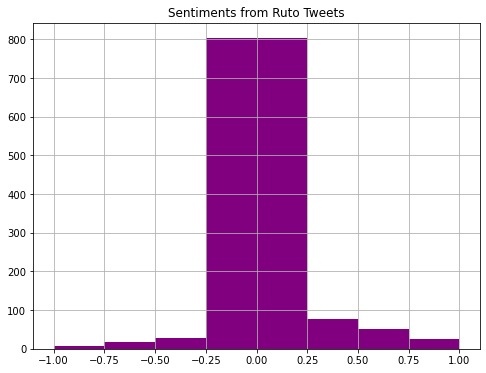

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
ruto_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Ruto Tweets")

plt.show()

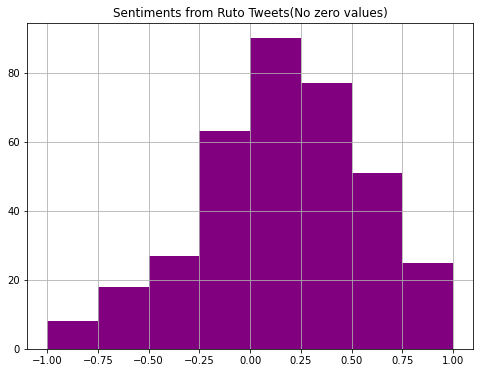

In [ ]:
ruto_sentiment_df_no_zero_values = ruto_sentiment_df[ruto_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

ruto_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Ruto Tweets(No zero values)")

plt.show()

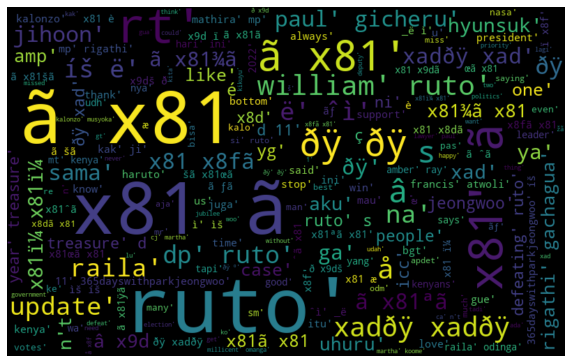

In [ ]:
all_words = ' '.join([str(text) for text in ruto_no_duplicates['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

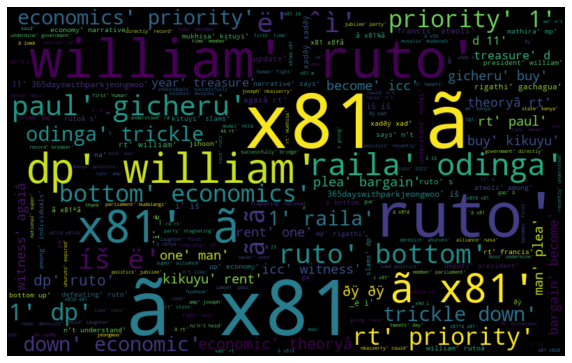

In [ ]:
all_words = ' '.join([str(text) for text in ruto['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

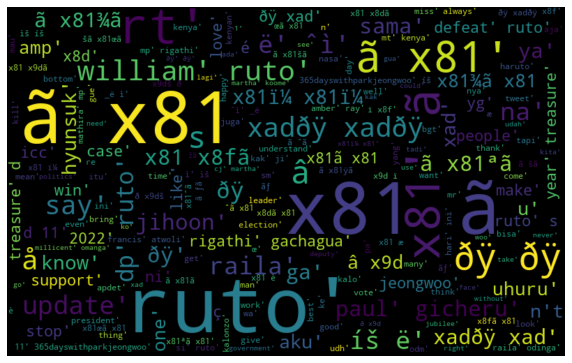

In [ ]:
all_words = ' '.join([str(text) for text in ruto_no_duplicates['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

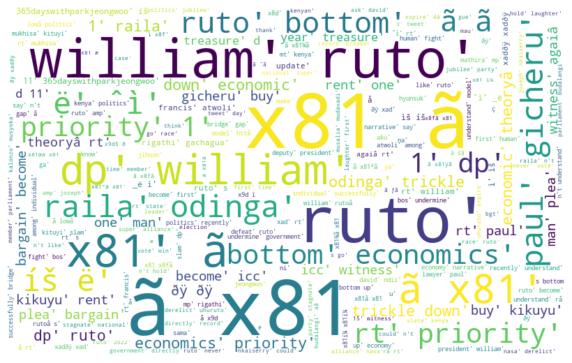

In [ ]:
all_words = ' '.join([str(text) for text in ruto['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'white').generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 3. Mudavadi

In [ ]:
mudavadi = pd.read_excel('Project Data (1).xlsx', sheet_name = 'Mudavadi')

mudavadi.head()

Unnamed: 0                   id  \
0           0  1419680129240999936   
1           1  1419679728038970112   
2           2  1419679140744130048   
3           3  1419678518703759872   
4           4  1419678008042990080   

                                                text  
0  RT @David1Mutai: Musalia Mudavadi actually sai...  
1  RT @wanyinaa: Kalonzo Musyoka doesn't want to ...  
2  @ngangadenni @OleItumbi @MusaliaMudavadi As wh...  
3  RT @wanji_raw1: Who fits best to be the next P...  
4  RT @wanyinaa: Kalonzo Musyoka doesn't want to ...

In [ ]:
mudavadi.shape

(2197, 3)

In [ ]:
mudavadi.drop('Unnamed: 0', axis = 'columns', inplace = True)

mudavadi_no_duplicates = mudavadi.drop_duplicates(subset = 'text')

mudavadi_no_duplicates.shape

(666, 2)

In [ ]:
mudavadi_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(mudavadi_no_duplicates['text'], "@[\w]*")

mudavadi_no_duplicates['removed_hashtags'] = mudavadi_no_duplicates['removed_@user'].apply(remove_hashtags)

mudavadi_no_duplicates['removed_links'] = mudavadi_no_duplicates['removed_hashtags'].apply(remove_links)

mudavadi_no_duplicates['tweet_sentence_tokenized'] = mudavadi_no_duplicates['removed_links'].apply(tokenize_into_sentence)

mudavadi_no_duplicates['tweet_word_tokenized'] = mudavadi_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

mudavadi_no_duplicates['removed_punctuations_and_stopwords'] = mudavadi_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

mudavadi_no_duplicates['tweet_stemmed'] = mudavadi_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

mudavadi_no_duplicates['tweet_lemmatized'] = mudavadi_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

mudavadi_no_duplicates.head(3)

id                                               text  \
0  1419680129240999936  RT @David1Mutai: Musalia Mudavadi actually sai...   
1  1419679728038970112  RT @wanyinaa: Kalonzo Musyoka doesn't want to ...   
2  1419679140744130048  @ngangadenni @OleItumbi @MusaliaMudavadi As wh...   

                                       removed_@user  \
0  RT : Musalia Mudavadi actually said this? Muda...   
1  RT : Kalonzo Musyoka doesn't want to leave NAS...   
2     As who, did Musalia mudavadi field a candid...   

                                    removed_hashtags  \
0  RT : Musalia Mudavadi actually said this? Muda...   
1  RT : Kalonzo Musyoka doesn't want to leave NAS...   
2     As who, did Musalia mudavadi field a candid...   

                                       removed_links  \
0  RT : Musalia Mudavadi actually said this? Muda...   
1  RT : Kalonzo Musyoka doesn't want to leave NAS...   
2     As who, did Musalia mudavadi field a candid...   

                            tweet_sentence_tokenized  \
0  [RT : Musalia Mudavadi actually said this?, Mu...   
1  [RT : Kalonzo Musyoka doesn't want to leave NA...   
2  [   As who, did Musalia mudavadi field a candi...   

                                tweet_word_tokenized  \
0  [rt, :, musalia, mudavadi, actually, said, thi...   
1  [rt, :, kalonzo, musyoka, does, n't, want, to,...   
2  [as, who, ,, did, musalia, mudavadi, field, a,...   

                  removed_punctuations_and_stopwords  \
0  [rt, musalia, mudavadi, actually, said, mudava...   
1  [rt, kalonzo, musyoka, n't, want, leave, nasa,...   
2              [musalia, mudavadi, field, candidate]   

                                       tweet_stemmed  \
0  [rt, musalia, mudavadi, actual, said, mudavadi...   
1  [rt, kalonzo, musyoka, n't, want, leav, nasa, ...   
2                 [musalia, mudavadi, field, candid]   

                                    tweet_lemmatized  
0  [rt, musalia, mudavadi, actually, say, mudavad...  
1  [rt, kalonzo, musyoka, n't, want, leave, nasa,...  
2              [musalia, mudavadi, field, candidate]

In [ ]:
mudavadi['removed_@user'] = np.vectorize(remove_pattern_in_text)(mudavadi['text'], "@[\w]*")

mudavadi['removed_hashtags'] = mudavadi['removed_@user'].apply(remove_hashtags)

mudavadi['removed_links'] = mudavadi['removed_hashtags'].apply(remove_links)

mudavadi['tweet_sentence_tokenized'] = mudavadi['removed_links'].apply(tokenize_into_sentence)

mudavadi['tweet_word_tokenized'] = mudavadi['removed_links'].str.lower().apply(tokenize_into_word)

mudavadi['removed_punctuations_and_stopwords'] = mudavadi['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

mudavadi['tweet_stemmed'] = mudavadi['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

mudavadi['tweet_lemmatized'] = mudavadi['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
mudavadi_sentiment_objects = [TextBlob(tweet) for tweet in mudavadi_no_duplicates['text']]

mudavadi_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in mudavadi_sentiment_objects]

mudavadi_sentiment_df = pd.DataFrame(mudavadi_sentiment_values, columns = ["polarity", "tweet"])

mudavadi_sentiment_df.describe()

polarity
count  666.000000
mean     0.107828
std      0.246206
min     -1.000000
25%      0.000000
50%      0.000000
75%      0.200000
max      1.000000

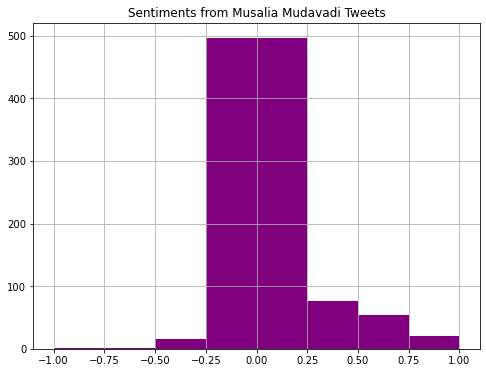

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
mudavadi_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Musalia Mudavadi Tweets")

plt.show()

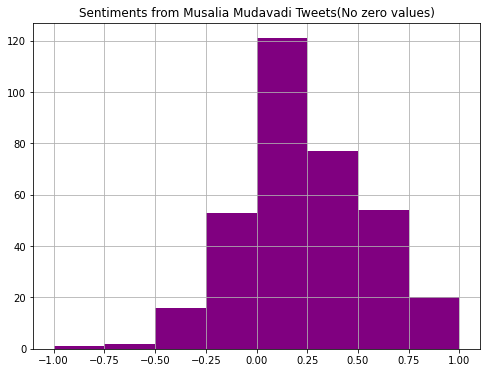

In [ ]:
mudavadi_sentiment_df_no_zero_values = mudavadi_sentiment_df[mudavadi_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

mudavadi_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Musalia Mudavadi Tweets(No zero values)")

plt.show()

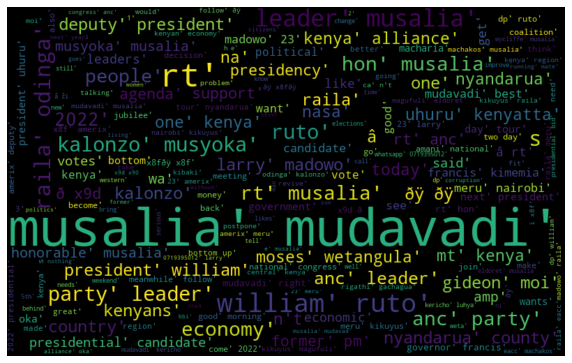

In [ ]:
all_words = ' '.join([str(text) for text in mudavadi_no_duplicates['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

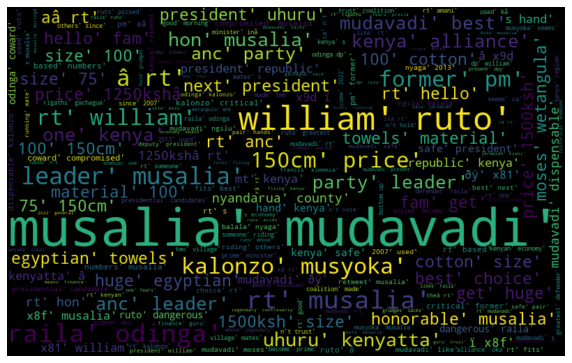

In [ ]:
all_words = ' '.join([str(text) for text in mudavadi['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

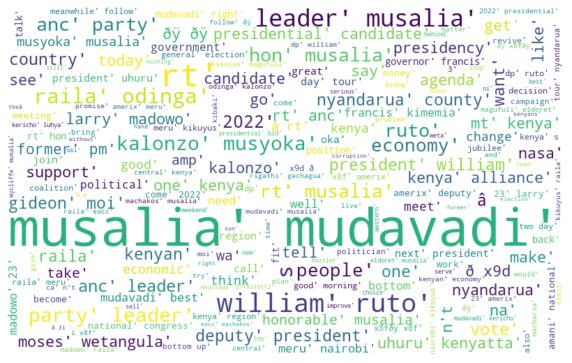

In [ ]:
all_words = ' '.join([str(text) for text in mudavadi_no_duplicates['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'white').generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

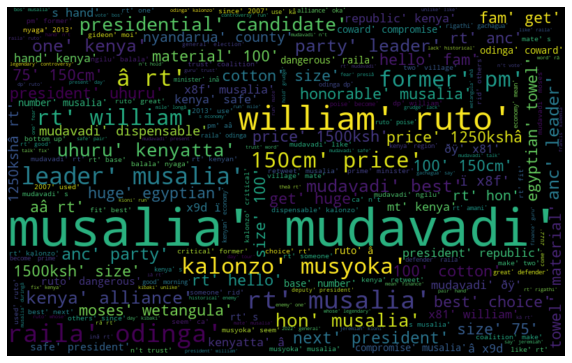

In [ ]:
all_words = ' '.join([str(text) for text in mudavadi['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 4. Paul Gicheru

In [ ]:
paul = pd.read_excel('Project Data (1).xlsx', sheet_name = 'Paul Gicheru')

paul.head()

Unnamed: 0                   id  \
0           4  1419699573132509952   
1           6  1419699553096369920   
2           7  1419699549925370112   
3          10  1419699365262889984   
4          19  1419698962798350080   

                                                text  
0  RT @SunRise047: Currently, 3.2 billion people ...  
1  CJ Martha Koome\nMathira Mp Rigathi Gachagua\n...  
2  RT @RAO2022: Lawyer Paul Gicheru has stated th...  
3  RT @MutahiNgunyi: Paul Gicheru? You cannot BUY...  
4  RT @Cjamehk: What Dennis Itumbi will not show ...

In [ ]:
paul.shape

(915, 3)

In [ ]:
paul.drop('Unnamed: 0', axis = 'columns', inplace = True)

paul_no_duplicates = paul.drop_duplicates(subset = 'text')

paul_no_duplicates.shape

(449, 2)

In [ ]:
paul_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(paul_no_duplicates['text'], "@[\w]*")

paul_no_duplicates['removed_hashtags'] = paul_no_duplicates['removed_@user'].apply(remove_hashtags)

paul_no_duplicates['removed_links'] = paul_no_duplicates['removed_hashtags'].apply(remove_links)

paul_no_duplicates['tweet_sentence_tokenized'] = paul_no_duplicates['removed_links'].apply(tokenize_into_sentence)

paul_no_duplicates['tweet_word_tokenized'] = paul_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

paul_no_duplicates['removed_punctuations_and_stopwords'] = paul_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

paul_no_duplicates['tweet_stemmed'] = paul_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

paul_no_duplicates['tweet_lemmatized'] = paul_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

paul_no_duplicates.head(3)

id                                               text  \
0  1419699573132509952  RT @SunRise047: Currently, 3.2 billion people ...   
1  1419699553096369920  CJ Martha Koome\nMathira Mp Rigathi Gachagua\n...   
2  1419699549925370112  RT @RAO2022: Lawyer Paul Gicheru has stated th...   

                                       removed_@user  \
0  RT : Currently, 3.2 billion people â€“ 40% of ...   
1  CJ Martha Koome\nMathira Mp Rigathi Gachagua\n...   
2  RT : Lawyer Paul Gicheru has stated that  kill...   

                                    removed_hashtags  \
0  RT : Currently, 3.2 billion people â€“ 40% of ...   
1  CJ Martha Koome\nMathira Mp Rigathi Gachagua\n...   
2  RT : Lawyer Paul Gicheru has stated that  kill...   

                                       removed_links  \
0  RT : Currently, 3.2 billion people â€“ 40% of ...   
1  CJ Martha Koome\nMathira Mp Rigathi Gachagua\n...   
2  RT : Lawyer Paul Gicheru has stated that  kill...   

                            tweet_sentence_tokenized  \
0  [RT : Currently, 3.2 billion people â€“ 40% of...   
1  [CJ Martha Koome\nMathira Mp Rigathi Gachagua\...   
2  [RT : Lawyer Paul Gicheru has stated that  kil...   

                                tweet_word_tokenized  \
0  [rt, :, currently, ,, 3.2, billion, people, â€...   
1  [cj, martha, koome, mathira, mp, rigathi, gach...   
2  [rt, :, lawyer, paul, gicheru, has, stated, th...   

                  removed_punctuations_and_stopwords  \
0  [rt, currently, 3.2, billion, people, â€, “, 4...   
1  [cj, martha, koome, mathira, mp, rigathi, gach...   
2  [rt, lawyer, paul, gicheru, stated, killed, 15...   

                                       tweet_stemmed  \
0  [rt, current, 3.2, billion, peopl, â€, “, 40, ...   
1  [cj, martha, koom, mathira, mp, rigathi, gacha...   
2  [rt, lawyer, paul, gicheru, state, kill, 15, i...   

                                    tweet_lemmatized  
0  [rt, currently, 3.2, billion, people, â€, “, 4...  
1  [cj, martha, koome, mathira, mp, rigathi, gach...  
2  [rt, lawyer, paul, gicheru, state, kill, 15, i...

In [ ]:
paul['removed_@user'] = np.vectorize(remove_pattern_in_text)(paul['text'], "@[\w]*")

paul['removed_hashtags'] = paul['removed_@user'].apply(remove_hashtags)

paul['removed_links'] = paul['removed_hashtags'].apply(remove_links)

paul['tweet_sentence_tokenized'] = paul['removed_links'].apply(tokenize_into_sentence)

paul['tweet_word_tokenized'] = paul['removed_links'].str.lower().apply(tokenize_into_word)

paul['removed_punctuations_and_stopwords'] = paul['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

paul['tweet_stemmed'] = paul['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

paul['tweet_lemmatized'] = paul['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
paul_sentiment_objects = [TextBlob(tweet) for tweet in paul_no_duplicates['text']]

paul_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in paul_sentiment_objects]

paul_sentiment_df = pd.DataFrame(paul_sentiment_values, columns = ["polarity", "tweet"])

paul_sentiment_df.describe()

polarity
count  449.000000
mean     0.010806
std      0.239152
min     -1.000000
25%     -0.062500
50%      0.000000
75%      0.091667
max      1.000000

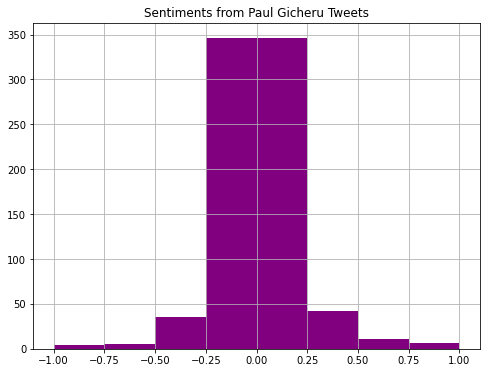

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
paul_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Paul Gicheru Tweets")

plt.show()

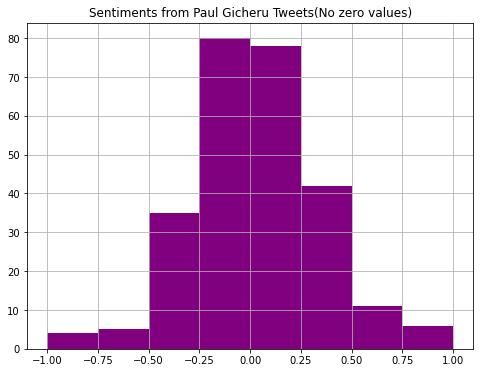

In [ ]:
paul_sentiment_df_no_zero_values = paul_sentiment_df[paul_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

paul_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from Paul Gicheru Tweets(No zero values)")

plt.show()

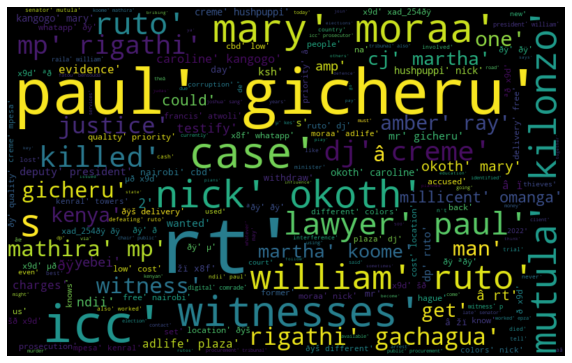

In [ ]:
all_words = ' '.join([str(text) for text in paul_no_duplicates['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

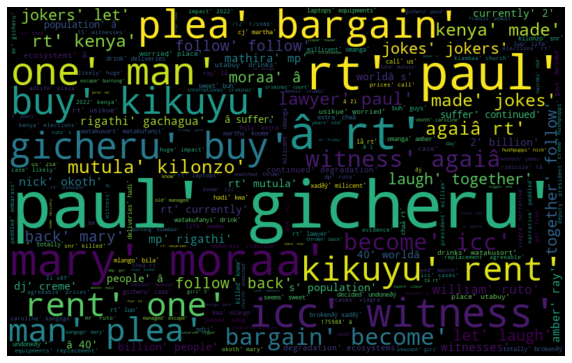

In [ ]:
all_words = ' '.join([str(text) for text in paul['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

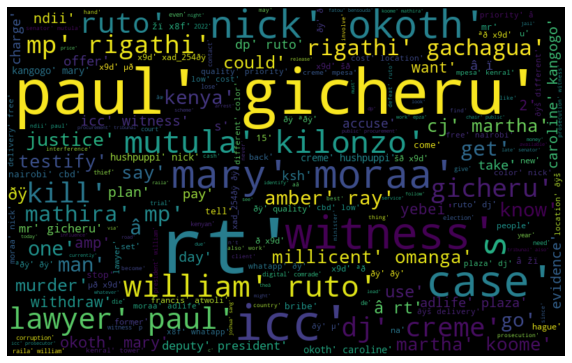

In [ ]:
all_words = ' '.join([str(text) for text in paul_no_duplicates['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

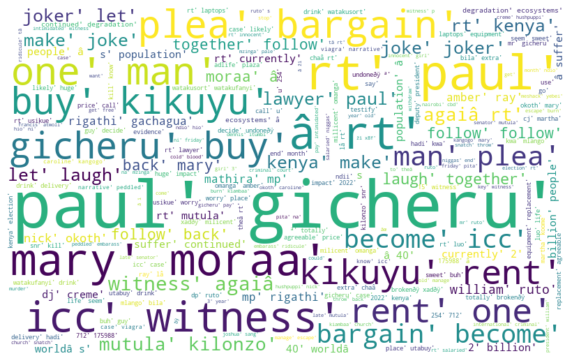

In [ ]:
all_words = ' '.join([str(text) for text in paul['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110, background_color = 'white').generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

### 5. Bottom Up Economics

In [ ]:
econ = pd.read_excel('Project Data (1).xlsx', sheet_name = '#BottomUpEconomics')

econ.head()

Unnamed: 0                   id  \
0           0  1421032716997479936   
1           1  1421032677109550080   
2           2  1421032584969169920   
3           3  1421032442857720064   
4           4  1421032270232699904   

                                                text  
0  @WilliamsRuto Trickle up , demand side economi...  
1  RT @joygaiz: Kenya is made of jokes and jokers...  
2  RT @joygaiz: Kenya is made of jokes and jokers...  
3  RT @DavidNdii: â€œThese choices I strongly bel...  
4  RT @joygaiz: Kenya is made of jokes and jokers...

In [ ]:
econ.shape

(694, 3)

In [ ]:
econ.drop('Unnamed: 0', axis = 'columns', inplace = True)

econ_no_duplicates = econ.drop_duplicates(subset = 'text')

econ_no_duplicates.shape

(206, 2)

In [ ]:
econ_no_duplicates['removed_@user'] = np.vectorize(remove_pattern_in_text)(econ_no_duplicates['text'], "@[\w]*")

econ_no_duplicates['removed_hashtags'] = econ_no_duplicates['removed_@user'].apply(remove_hashtags)

econ_no_duplicates['removed_links'] = econ_no_duplicates['removed_hashtags'].apply(remove_links)

econ_no_duplicates['tweet_sentence_tokenized'] = econ_no_duplicates['removed_links'].apply(tokenize_into_sentence)

econ_no_duplicates['tweet_word_tokenized'] = econ_no_duplicates['removed_links'].str.lower().apply(tokenize_into_word)

econ_no_duplicates['removed_punctuations_and_stopwords'] = econ_no_duplicates['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

econ_no_duplicates['tweet_stemmed'] = econ_no_duplicates['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

econ_no_duplicates['tweet_lemmatized'] = econ_no_duplicates['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

econ_no_duplicates.head(3)

id                                               text  \
0  1421032716997479936  @WilliamsRuto Trickle up , demand side economi...   
1  1421032677109550080  RT @joygaiz: Kenya is made of jokes and jokers...   
3  1421032442857720064  RT @DavidNdii: â€œThese choices I strongly bel...   

                                       removed_@user  \
0   Trickle up , demand side economics, investing...   
1  RT : Kenya is made of jokes and jokers, let la...   
3  RT : â€œThese choices I strongly believe help ...   

                                    removed_hashtags  \
0   Trickle up , demand side economics, investing...   
1  RT : Kenya is made of jokes and jokers, let la...   
3  RT : â€œThese choices I strongly believe help ...   

                                       removed_links  \
0   Trickle up , demand side economics, investing...   
1  RT : Kenya is made of jokes and jokers, let la...   
3  RT : â€œThese choices I strongly believe help ...   

                            tweet_sentence_tokenized  \
0  [ Trickle up , demand side economics, investin...   
1  [RT : Kenya is made of jokes and jokers, let l...   
3  [RT : â€œThese choices I strongly believe help...   

                                tweet_word_tokenized  \
0  [trickle, up, ,, demand, side, economics, ,, i...   
1  [rt, :, kenya, is, made, of, jokes, and, joker...   
3  [rt, :, â€œthese, choices, i, strongly, believ...   

                  removed_punctuations_and_stopwords  \
0  [trickle, demand, side, economics, investing, ...   
1  [rt, kenya, made, jokes, jokers, let, laugh, t...   
3  [rt, â€œthese, choices, strongly, believe, hel...   

                                       tweet_stemmed  \
0  [trickl, demand, side, econom, invest, whose, ...   
1  [rt, kenya, made, joke, joker, let, laugh, tog...   
3  [rt, â€œthese, choic, strongli, believ, help, ...   

                                    tweet_lemmatized  
0  [trickle, demand, side, economics, invest, who...  
1  [rt, kenya, make, joke, joker, let, laugh, tog...  
3  [rt, â€œthese, choice, strongly, believe, help...

In [ ]:
econ['removed_@user'] = np.vectorize(remove_pattern_in_text)(econ['text'], "@[\w]*")

econ['removed_hashtags'] = econ['removed_@user'].apply(remove_hashtags)

econ['removed_links'] = econ['removed_hashtags'].apply(remove_links)

econ['tweet_sentence_tokenized'] = econ['removed_links'].apply(tokenize_into_sentence)

econ['tweet_word_tokenized'] = econ['removed_links'].str.lower().apply(tokenize_into_word)

econ['removed_punctuations_and_stopwords'] = econ['tweet_word_tokenized'].apply(remove_punctuation_and_stopwords)

econ['tweet_stemmed'] = econ['removed_punctuations_and_stopwords'].apply(lambda x: stemming(x))

econ['tweet_lemmatized'] = econ['removed_punctuations_and_stopwords'].apply(lemmatize_sent)

In [ ]:
econ_sentiment_objects = [TextBlob(tweet) for tweet in econ_no_duplicates['text']]

econ_sentiment_values = [[tweet.sentiment.polarity, str(tweet)] for tweet in econ_sentiment_objects]

econ_sentiment_df = pd.DataFrame(econ_sentiment_values, columns = ["polarity", "tweet"])

econ_sentiment_df.describe()

polarity
count  206.000000
mean     0.084931
std      0.227414
min     -0.800000
25%      0.000000
50%      0.000000
75%      0.184489
max      1.000000

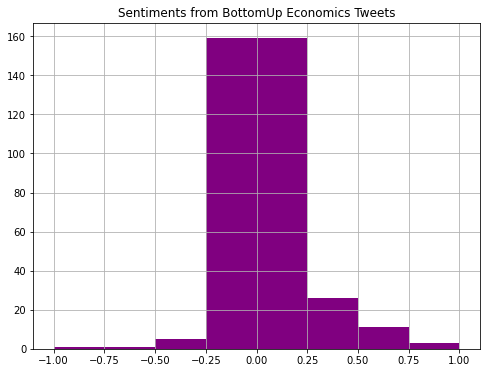

In [ ]:
fig, ax = plt.subplots(figsize = (8, 6))

# Plot histogram of the polarity values
econ_sentiment_df.hist(bins = [-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from BottomUp Economics Tweets")

plt.show()

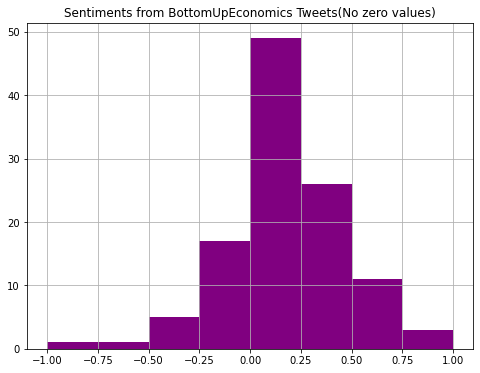

In [ ]:
econ_sentiment_df_no_zero_values = econ_sentiment_df[econ_sentiment_df['polarity'] != 0]

fig, ax = plt.subplots(figsize = (8, 6))

econ_sentiment_df_no_zero_values.hist(bins = [-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax = ax,
             color = "purple")

plt.title("Sentiments from BottomUpEconomics Tweets(No zero values)")

plt.show()

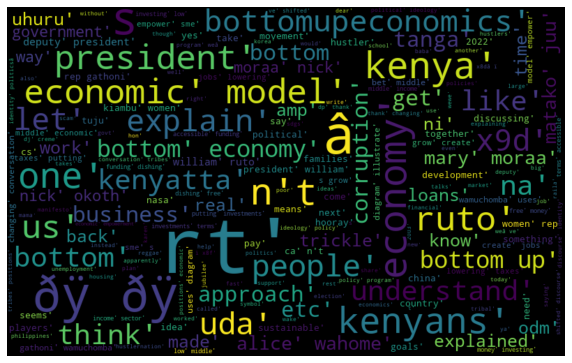

In [ ]:
all_words = ' '.join([str(text) for text in econ_no_duplicates['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

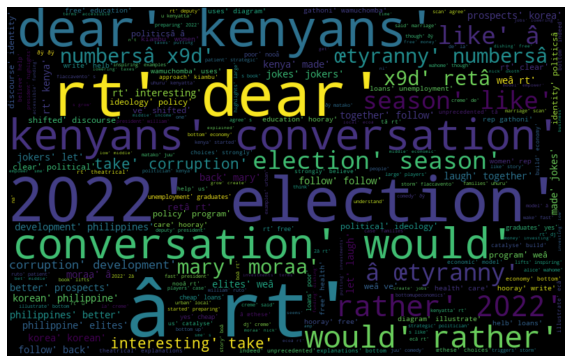

In [ ]:
all_words = ' '.join([str(text) for text in econ['removed_punctuations_and_stopwords']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

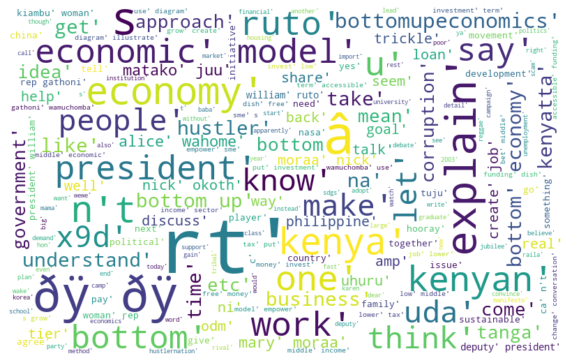

In [ ]:
all_words = ' '.join([str(text) for text in econ_no_duplicates['tweet_lemmatized']])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

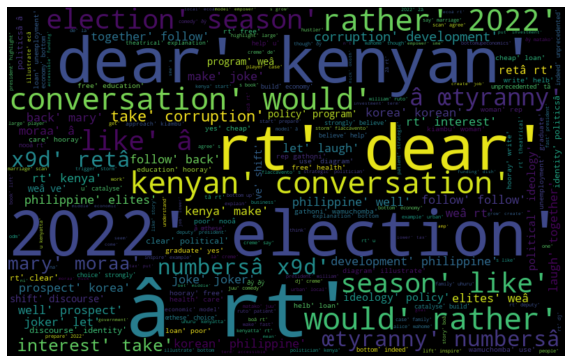

In [ ]:
all_words = ' '.join([str(text) for text in econ['tweet_lemmatized']])

from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(all_words)

plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis('off')
plt.show()